In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the Excel file directly (skipping header rows)
try:
    # Read Excel file, skipping the first 15 rows (metadata/headers)
    # Sheet name is "England Level Data"
    df_raw = pd.read_excel(
        '/Users/phoenix/Downloads/Monthly-AE-Time-Series-September-2025.xls',
        sheet_name='Activity',
        skiprows=13  # Skip the title/metadata rows
    )
    
    print(f"✓ Data loaded: {len(df_raw)} rows")
    
except FileNotFoundError:
    print("⚠ File not found!")
    print("Please ensure 'Monthly-AE-Time-Series-September-2025.xls' is in the same folder")
    exit()


# Check what we got
print("Shape:", df_raw.shape)
print("\nFirst few rows:")
df_raw.head()

✓ Data loaded: 182 rows
Shape: (182, 18)

First few rows:


,Unnamed: 0,Period,Type 1 Departments - Major A&E,Type 2 Departments - Single Specialty,Type 3 Departments - Other A&E/Minor Injury Unit,Total Attendances,Emergency Admissions via Type 1 A&E,Emergency Admissions via Type 2 A&E,Emergency Admissions via Type 3 and 4 A&E,Total Emergency Admissions via A&E,Other Emergency Admissions (i.e not via A&E),Total Emergency Admissions,Number of patients spending >4 hours from decision to admit to admission,Number of patients spending >12 hours from decision to admit to admission,Unnamed: 14,Operational standard (Performance),Unnamed: 16,0.95
0,NaN,2010-08-01,1.138652e+06,54371.000000,559358.000000,1.752381e+06,287438.000000,5367.000000,8081.000000,300886.000000,124816.000000,425702.000000,3697.000000,1.0,NaN,0.95,NaN,NaN
1,NaN,2010-09-01,1.150728e+06,55181.000000,550359.000000,1.756268e+06,293991.000000,5543.000000,3673.000000,303207.000000,121693.000000,424900.000000,5907.000000,0.0,NaN,0.95,NaN,NaN
2,NaN,2010-10-01,1.163143e+06,54961.000000,583244.000000,1.801348e+06,303452.000000,5485.000000,2560.000000,311497.000000,124718.000000,436215.000000,6932.000000,0.0,NaN,0.95,NaN,NaN
3,NaN,2010-11-01,1.111295e+06,53727.428571,486005.428571,1.651027e+06,297832.000000,5731.142857,3279.000000,306842.142857,122256.857143,429099.000000,7179.000000,2.0,NaN,0.95,NaN,NaN
4,NaN,2010-12-01,1.159204e+06,45536.428571,533000.857143,1.737741e+06,318602.428571,6277.000000,3198.428571,328077.857143,124650.857143,452728.714286,13818.142857,15.0,NaN,0.95,NaN,NaN


In [5]:
# See all column names
print("Columns in the data:")
for i, col in enumerate(df_raw.columns):
    print(f"{i}: {col}")

Columns in the data:
0: Unnamed: 0
1: Period
2: Type 1 Departments - Major A&E
3: Type 2 Departments - Single Specialty
4: Type 3 Departments - Other A&E/Minor Injury Unit
5: Total Attendances
6: Emergency Admissions via Type 1 A&E
7: Emergency Admissions via Type 2 A&E
8: Emergency Admissions via Type 3 and 4 A&E
9: Total Emergency Admissions via A&E
10: Other Emergency Admissions (i.e not via A&E)
11: Total Emergency Admissions
12: Number of patients spending >4 hours from decision to admit to admission
13: Number of patients spending >12 hours from decision to admit to admission
14: Unnamed: 14
15: Operational standard (Performance)
16: Unnamed: 16
17: 0.95


In [6]:
# Create a new clean dataframe
df = pd.DataFrame()

# Get columns by position (adjust these numbers based on Cell 3 output)
df['period'] = df_raw.iloc[:, 1]  # First column
df['total_attendances'] = df_raw.iloc[:, 4]  # 5th column (index 4)
df['emergency_admissions'] = df_raw.iloc[:, 5]  # 6th column
df['over_4hrs'] = df_raw.iloc[:, 12]  # 13th column
df['over_12hrs'] = df_raw.iloc[:, 13]  # 14th column

# Look at what we got
df.head(10)

,period,total_attendances,emergency_admissions,over_4hrs,over_12hrs
0,2010-08-01,559358.000000,1.752381e+06,3697.000000,1.000000
1,2010-09-01,550359.000000,1.756268e+06,5907.000000,0.000000
2,2010-10-01,583244.000000,1.801348e+06,6932.000000,0.000000
3,2010-11-01,486005.428571,1.651027e+06,7179.000000,2.000000
4,2010-12-01,533000.857143,1.737741e+06,13818.142857,15.000000
5,2011-01-01,542331.285714,1.727797e+06,13162.000000,17.285714
6,2011-02-01,494407.571429,1.599364e+06,7872.428571,2.714286
7,2011-03-01,580318.571429,1.863441e+06,8602.142857,0.571429
8,2011-04-01,593119.714286,1.844375e+06,7530.571429,6.428571
9,2011-05-01,594940.714286,1.873695e+06,7308.571429,2.571429


In [7]:
# Remove rows where period or date is missing
df = df.dropna(subset=['period'])

# Remove any weird rows at the end (sometimes Excel has empty rows)
df = df[df['total_attendances'].notna()]

print(f"Rows remaining: {len(df)}")
df.head()

Rows remaining: 182


,period,total_attendances,emergency_admissions,over_4hrs,over_12hrs
0,2010-08-01,559358.000000,1.752381e+06,3697.000000,1.0
1,2010-09-01,550359.000000,1.756268e+06,5907.000000,0.0
2,2010-10-01,583244.000000,1.801348e+06,6932.000000,0.0
3,2010-11-01,486005.428571,1.651027e+06,7179.000000,2.0
4,2010-12-01,533000.857143,1.737741e+06,13818.142857,15.0


In [8]:
# Keep only data from June 2015 onwards
df = df[df['period'] >= '2015-06-01']

# Sort by date
df = df.sort_values('period')

# Reset the index (important!)
df = df.reset_index(drop=True)

print(f"Date range: {df['period'].min()} to {df['period'].max()}")
print(f"Total months: {len(df)}")

Date range: 2015-06-01 00:00:00 to 2025-09-01 00:00:00
Total months: 124


In [9]:
# These columns might have commas in them (like "1,234,567")
# Convert them to actual numbers

columns_to_clean = ['total_attendances', 'emergency_admissions', 'over_4hrs', 'over_12hrs']

for col in columns_to_clean:
    # Convert to string, remove commas, convert to number
    df[col] = df[col].astype(str).str.replace(',', '')
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Check it worked
df.head()

,period,total_attendances,emergency_admissions,over_4hrs,over_12hrs
0,2015-06-01,608598.0,1911209.0,19065.0,25.0
1,2015-07-01,627955.0,1952895.0,17275.0,22.0
2,2015-08-01,599855.0,1865139.0,20030.0,28.0
3,2015-09-01,587517.0,1859979.0,25883.0,23.0
4,2015-10-01,611438.0,1923108.0,31582.0,58.0


In [10]:
# Breach rate = % of people who waited over 4 hours
df['breach_rate'] = (df['over_4hrs'] / df['total_attendances']) * 100

# Admission rate = % of attendees who got admitted
df['admission_rate'] = (df['emergency_admissions'] / df['total_attendances']) * 100

# Look at the new columns
df[['period', 'total_attendances', 'breach_rate', 'admission_rate']].head()

,period,total_attendances,breach_rate,admission_rate
0,2015-06-01,608598.0,3.132610,314.034716
1,2015-07-01,627955.0,2.750993,310.992826
2,2015-08-01,599855.0,3.339140,310.931642
3,2015-09-01,587517.0,4.405490,316.583010
4,2015-10-01,611438.0,5.165201,314.522159


In [11]:
print("Summary Statistics:")
print(f"Average monthly attendances: {df['total_attendances'].mean():,.0f}")
print(f"Average breach rate: {df['breach_rate'].mean():.1f}%")
print(f"Minimum breach rate: {df['breach_rate'].min():.1f}%")
print(f"Maximum breach rate: {df['breach_rate'].max():.1f}%")

Summary Statistics:
Average monthly attendances: 680,429
Average breach rate: 12.1%
Minimum breach rate: 2.8%
Maximum breach rate: 27.8%


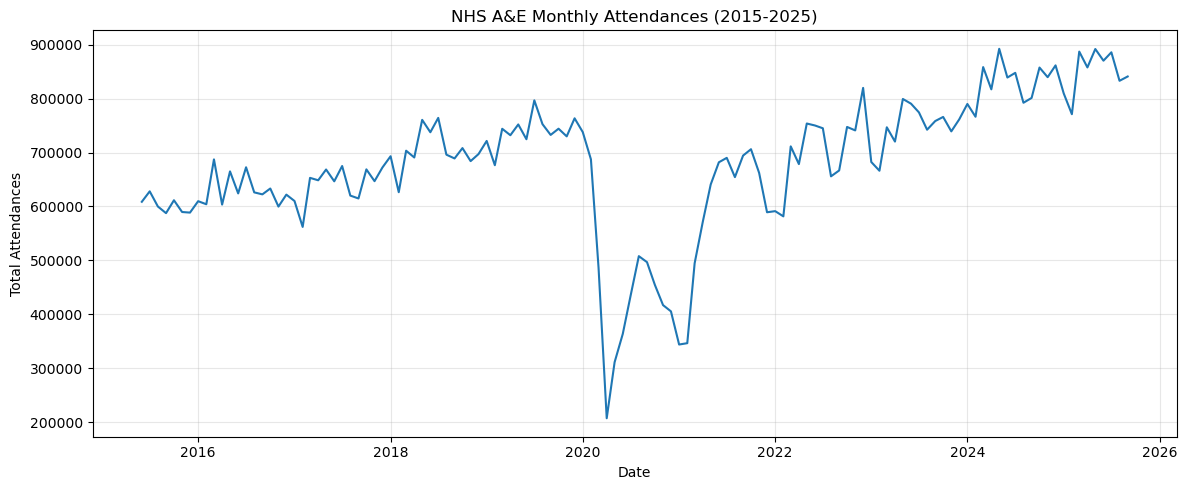

In [12]:
# Create a simple plot
plt.figure(figsize=(12, 5))

plt.plot(df['period'], df['total_attendances'])
plt.title('NHS A&E Monthly Attendances (2015-2025)')
plt.xlabel('Date')
plt.ylabel('Total Attendances')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

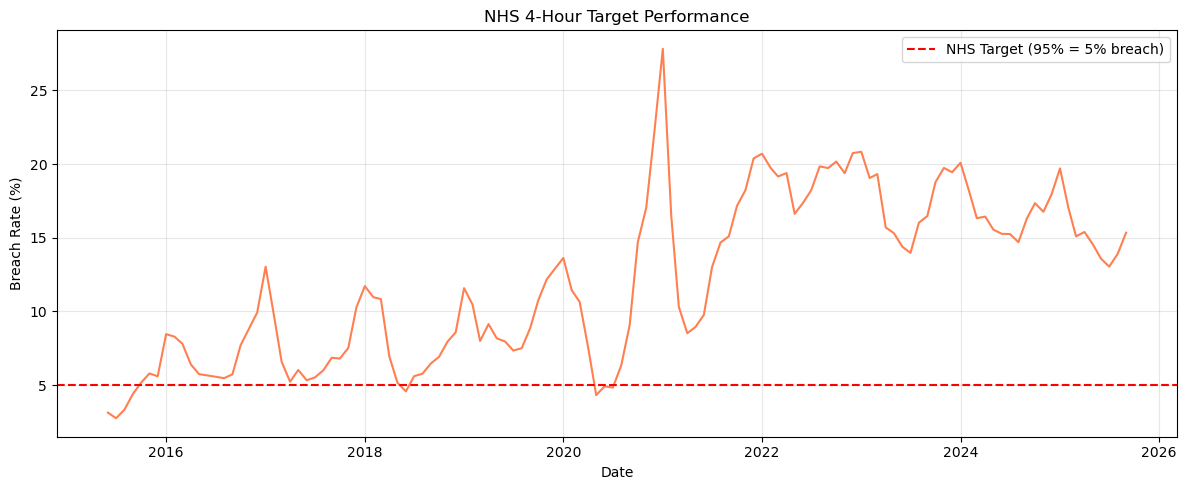

In [13]:
plt.figure(figsize=(12, 5))

plt.plot(df['period'], df['breach_rate'], color='coral')
plt.axhline(y=5, color='red', linestyle='--', label='NHS Target (95% = 5% breach)')
plt.title('NHS 4-Hour Target Performance')
plt.xlabel('Date')
plt.ylabel('Breach Rate (%)')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

In [14]:
# Save to CSV for later use
df.to_csv('nhs_clean_data.csv', index=False)
print("✓ Saved to nhs_clean_data.csv")

✓ Saved to nhs_clean_data.csv


In [17]:
# Extract useful date information
df['year'] = df['period'].dt.year
df['month'] = df['period'].dt.month
df['quarter'] = df['period'].dt.quarter

# Create season (1=Winter, 2=Spring, 3=Summer, 4=Autumn)
df['season'] = (df['month'] % 12 + 3) // 3

# Check what we added
df[['period', 'year', 'month', 'quarter', 'season']].head(10)

,period,year,month,quarter,season
0,2015-06-01,2015,6,2,3
1,2015-07-01,2015,7,3,3
2,2015-08-01,2015,8,3,3
3,2015-09-01,2015,9,3,4
4,2015-10-01,2015,10,4,4
5,2015-11-01,2015,11,4,4
6,2015-12-01,2015,12,4,1
7,2016-01-01,2016,1,1,1
8,2016-02-01,2016,2,1,1
9,2016-03-01,2016,3,1,2


In [19]:
# Group by season and calculate average
seasonal_avg = df.groupby('season')['total_attendances'].mean()

# Give seasons proper names
season_names = {1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Autumn'}
seasonal_avg.index = seasonal_avg.index.map(season_names)

print("Average Attendances by Season:")
print(seasonal_avg.round(0))

# Calculate winter vs summer difference
winter_avg = seasonal_avg['Winter']
summer_avg = seasonal_avg['Summer']
winter_increase = ((winter_avg - summer_avg) / summer_avg) * 100

print(f"\nWinter is {winter_increase:.1f}% higher than Summer")

Average Attendances by Season:
season
Winter    655242.0
Spring    687800.0
Summer    697921.0
Autumn    679051.0
Name: total_attendances, dtype: float64

Winter is -6.1% higher than Summer


Average Monthly Attendances by Year:
year
2015    601934.0
2016    630770.0
2017    640504.0
2018    704172.0
2019    739168.0
2020    459105.0
2021    589582.0
2022    703514.0
2023    745584.0
2024    830275.0
2025    849738.0
Name: total_attendances, dtype: float64


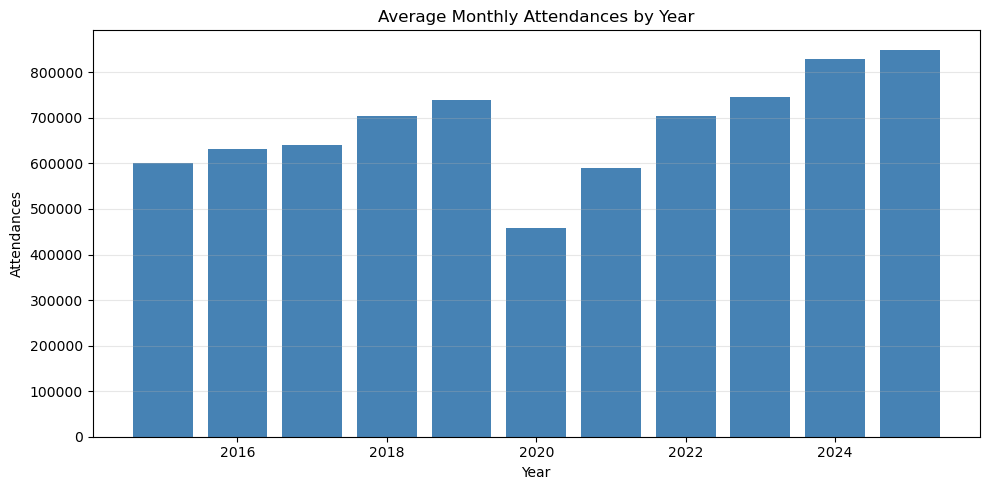

In [21]:
# Average by year
yearly_avg = df.groupby('year')['total_attendances'].mean()

print("Average Monthly Attendances by Year:")
print(yearly_avg.round(0))

# Plot it
plt.figure(figsize=(10, 5))
plt.bar(yearly_avg.index, yearly_avg.values, color='steelblue')
plt.title('Average Monthly Attendances by Year')
plt.xlabel('Year')
plt.ylabel('Attendances')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [25]:
# Create features based on previous months
# These help predict future values

# Last month's admissions
df['admissions_lag1'] = df['emergency_admissions'].shift(1)

# 3 months ago
df['admissions_lag3'] = df['emergency_admissions'].shift(3)

# 3-month rolling average
df['admissions_3month_avg'] = df['emergency_admissions'].rolling(window=3).mean()

# 6-month rolling average
df['admissions_6month_avg'] = df['emergency_admissions'].rolling(window=6).mean()

# Trend (difference between 3-month and 6-month average)
df['admissions_trend'] = df['admissions_3month_avg'] - df['admissions_6month_avg']

# Look at what we created
df[['period', 'emergency_admissions', 'admissions_lag1', 'admissions_3month_avg', 'admissions_trend']].head(10)

,period,emergency_admissions,admissions_lag1,admissions_3month_avg,admissions_trend
0,2015-06-01,1.911209e+06,NaN,NaN,NaN
1,2015-07-01,1.952895e+06,1.911209e+06,NaN,NaN
2,2015-08-01,1.865139e+06,1.952895e+06,1.909748e+06,NaN
3,2015-09-01,1.859979e+06,1.865139e+06,1.892671e+06,NaN
4,2015-10-01,1.923108e+06,1.859979e+06,1.882742e+06,NaN
5,2015-11-01,1.874235e+06,1.923108e+06,1.885774e+06,-11986.833333
6,2015-12-01,1.867652e+06,1.874235e+06,1.888332e+06,-2169.666667
7,2016-01-01,1.906920e+06,1.867652e+06,1.882936e+06,96.904762
8,2016-02-01,1.870776e+06,1.906920e+06,1.881783e+06,-1995.595238
9,2016-03-01,2.087553e+06,1.870776e+06,1.955083e+06,33375.738095


In [29]:
# The lag and rolling features created NaN in first few rows
# Let's remove those

print(f"Rows before cleaning: {len(df)}")

df_clean = df.dropna()

print(f"Rows after cleaning: {len(df_clean)}")
print(f"Removed {len(df) - len(df_clean)} rows with missing lag features")

# Check date range
print(f"\nNew date range: {df_clean['period'].min()} to {df_clean['period'].max()}")

Rows before cleaning: 124
Rows after cleaning: 119
Removed 5 rows with missing lag features

New date range: 2015-11-01 00:00:00 to 2025-09-01 00:00:00


In [31]:
# Select features for our model
feature_columns = [
    'month',
    'quarter', 
    'season',
    'admissions_lag1',
    'admissions_lag3',
    'admissions_3month_avg',
    'admissions_trend',
    'breach_rate'
]

# Features (X) and target (y)
X = df_clean[feature_columns]
y = df_clean['emergency_admissions']

print("Features shape:", X.shape)
print("Target shape:", y.shape)
print("\nFeature columns:")
for i, col in enumerate(feature_columns):
    print(f"  {i+1}. {col}")

Features shape: (119, 8)
Target shape: (119,)

Feature columns:
  1. month
  2. quarter
  3. season
  4. admissions_lag1
  5. admissions_lag3
  6. admissions_3month_avg
  7. admissions_trend
  8. breach_rate


In [35]:
from sklearn.model_selection import train_test_split

# For time series, we don't shuffle - keep chronological order
# Use 80% for training, 20% for testing

split_point = int(len(X) * 0.8)

X_train = X[:split_point]
X_test = X[split_point:]
y_train = y[:split_point]
y_test = y[split_point:]

print(f"Training set: {len(X_train)} months")
print(f"Test set: {len(X_test)} months")

# What dates do these correspond to?
print(f"\nTraining period: {df_clean['period'].iloc[0]} to {df_clean['period'].iloc[split_point-1]}")
print(f"Test period: {df_clean['period'].iloc[split_point]} to {df_clean['period'].iloc[-1]}")

Training set: 95 months
Test set: 24 months

Training period: 2015-11-01 00:00:00 to 2023-09-01 00:00:00
Test period: 2023-10-01 00:00:00 to 2025-09-01 00:00:00


In [37]:
from sklearn.preprocessing import StandardScaler

# Create scaler
scaler = StandardScaler()

# Fit on training data and transform both sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling complete!")
print(f"Training features scaled shape: {X_train_scaled.shape}")
print(f"Test features scaled shape: {X_test_scaled.shape}")

Scaling complete!
Training features scaled shape: (95, 8)
Test features scaled shape: (24, 8)


In [39]:
from sklearn.ensemble import RandomForestRegressor

# Create the model
model = RandomForestRegressor(
    n_estimators=100,      # Number of trees
    max_depth=10,          # Maximum depth of trees
    min_samples_split=5,   # Minimum samples to split a node
    random_state=42        # For reproducibility
)

# Train the model
print("Training model...")
model.fit(X_train_scaled, y_train)
print("✓ Model trained!")

Training model...
✓ Model trained!


In [41]:
# Predict on both training and test sets
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Predictions made!")
print(f"Training predictions: {len(y_train_pred)}")
print(f"Test predictions: {len(y_test_pred)}")

Predictions made!
Training predictions: 95
Test predictions: 24


In [43]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics for training set
train_mae = mean_absolute_error(y_train, y_train_pred)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for test set
test_mae = mean_absolute_error(y_test, y_test_pred)
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
test_r2 = r2_score(y_test, y_test_pred)

print("="*50)
print("MODEL PERFORMANCE")
print("="*50)
print("\nTraining Set:")
print(f"  MAE:  {train_mae:,.0f} admissions")
print(f"  RMSE: {train_rmse:,.0f} admissions")
print(f"  R²:   {train_r2:.3f}")

print("\nTest Set:")
print(f"  MAE:  {test_mae:,.0f} admissions")
print(f"  RMSE: {test_rmse:,.0f} admissions")
print(f"  R²:   {test_r2:.3f}")

print(f"\nAverage actual admissions: {y_test.mean():,.0f}")
print(f"MAE as % of mean: {(test_mae/y_test.mean())*100:.1f}%")

MODEL PERFORMANCE

Training Set:
  MAE:  36,645 admissions
  RMSE: 58,550 admissions
  R²:   0.942

Test Set:
  MAE:  137,308 admissions
  RMSE: 153,715 admissions
  R²:   -1.957

Average actual admissions: 2,280,352
MAE as % of mean: 6.0%


Feature Importance (most to least important):
              feature  importance
admissions_3month_avg    0.766375
      admissions_lag1    0.111240
     admissions_trend    0.058024
      admissions_lag3    0.020229
          breach_rate    0.019744
                month    0.012318
               season    0.007082
              quarter    0.004986


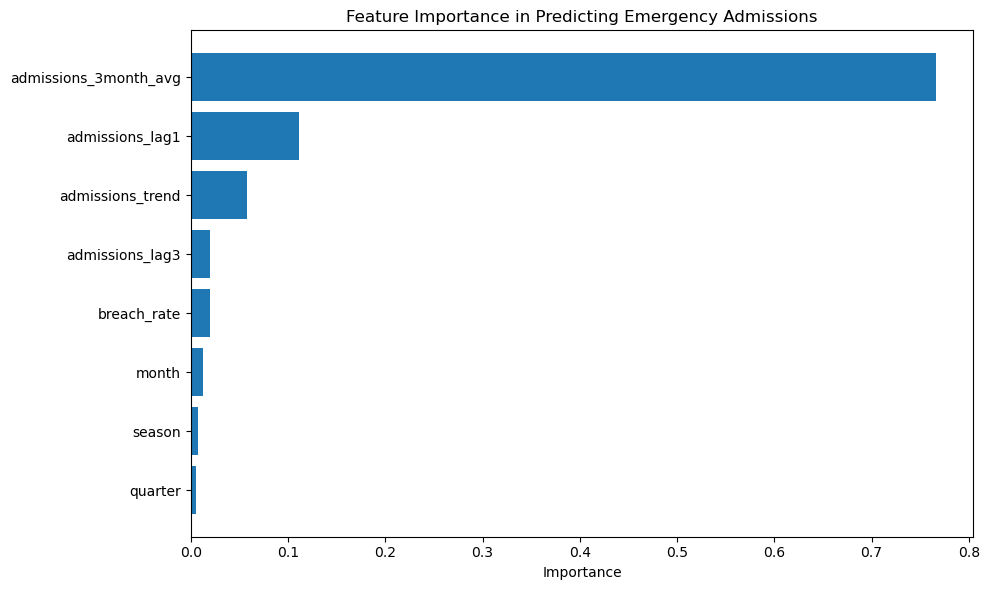

In [45]:
# What features matter most?
feature_importance = pd.DataFrame({
    'feature': feature_columns,
    'importance': model.feature_importances_
})

# Sort by importance
feature_importance = feature_importance.sort_values('importance', ascending=False)

print("Feature Importance (most to least important):")
print(feature_importance.to_string(index=False))

# Plot it
plt.figure(figsize=(10, 6))
plt.barh(feature_importance['feature'], feature_importance['importance'])
plt.xlabel('Importance')
plt.title('Feature Importance in Predicting Emergency Admissions')
plt.gca().invert_yaxis()  # Highest importance at top
plt.tight_layout()
plt.show()

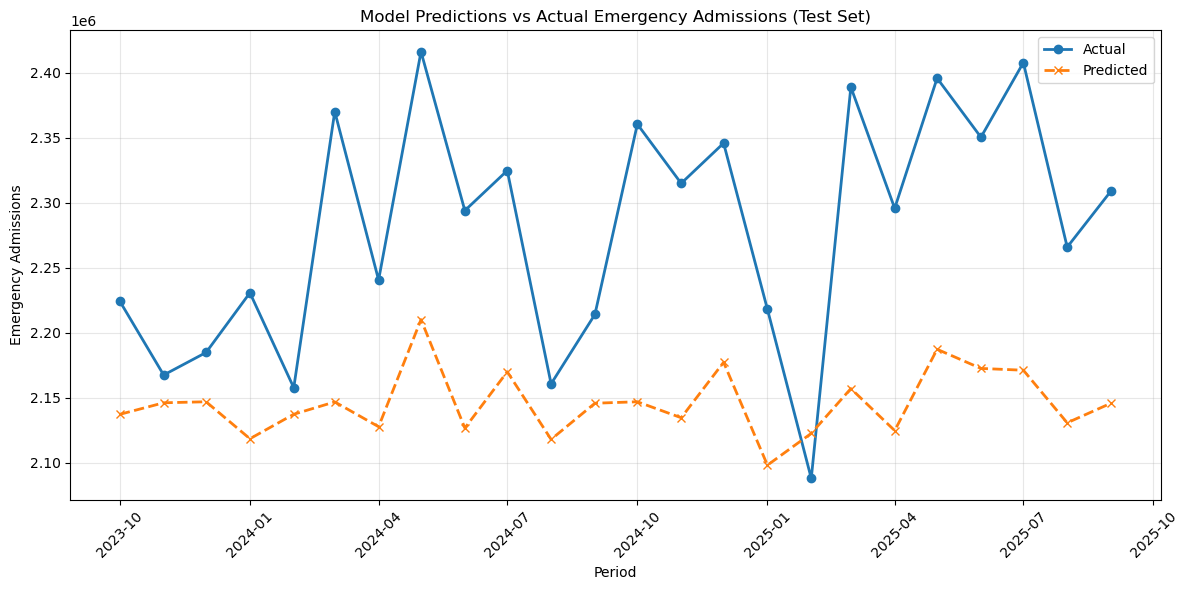

In [51]:
# Plot actual vs predicted for test set
plt.figure(figsize=(12, 6))

# Get test dates
test_dates = df_clean['period'].iloc[split_point:].values

plt.plot(test_dates, y_test.values, label='Actual', linewidth=2, marker='o')
plt.plot(test_dates, y_test_pred, label='Predicted', linewidth=2, marker='x', linestyle='--')

plt.title('Model Predictions vs Actual Emergency Admissions (Test Set)')
plt.xlabel('Period')
plt.ylabel('Emergency Admissions')
plt.legend()
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

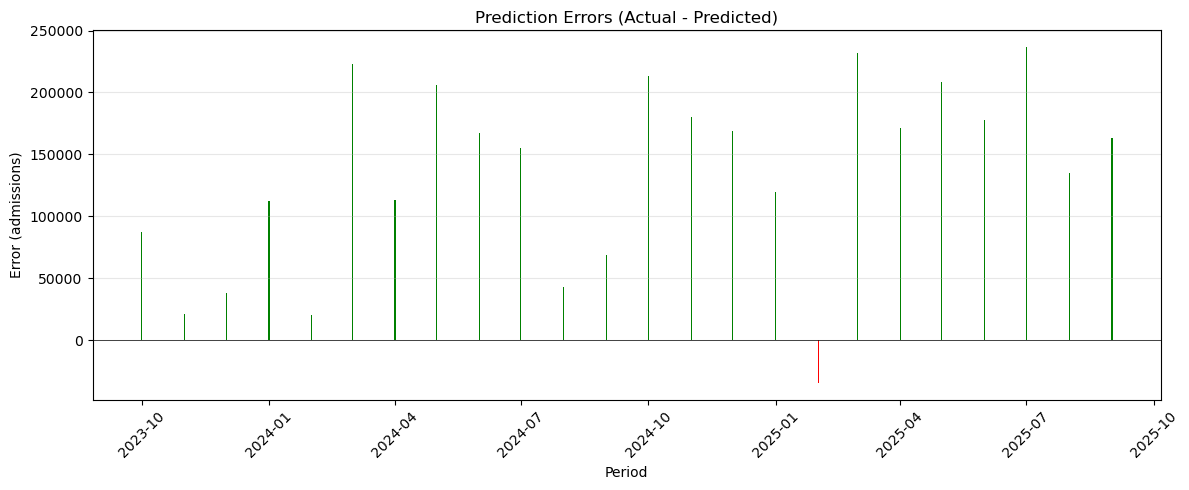

Largest overestimation: -34,626 admissions
Largest underestimation: 236,618 admissions


In [53]:
# How far off were we?
test_errors = y_test.values - y_test_pred
test_dates = df_clean['period'].iloc[split_point:].values

# Plot the errors
plt.figure(figsize=(12, 5))
plt.bar(test_dates, test_errors, color=['red' if e < 0 else 'green' for e in test_errors])
plt.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
plt.title('Prediction Errors (Actual - Predicted)')
plt.xlabel('Period')
plt.ylabel('Error (admissions)')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

print(f"Largest overestimation: {test_errors.min():,.0f} admissions")
print(f"Largest underestimation: {test_errors.max():,.0f} admissions")